<a href="https://colab.research.google.com/github/AyaSoliman124/stock_market_googalcolab/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [51]:
stock_market_dataset = pd.read_csv('/content/dataset_train_validation.csv')

In [52]:
stock_market_dataset.head()

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
0,ABEO,0.0,NASDAQ,2021,12,10,15,30,278351,0.6348,...,0.1,60000.0,20000.0,885269.5,5.061970e+08,9.576243e+08,18.0,18.0,0.2421,NaN
1,ABEO,1.0,NASDAQ,2021,12,9,15,30,617597,0.6800,...,0.1,60000.0,20000.0,887668.9,-1.389370e+09,-1.990617e+09,18.0,18.0,0.5423,NaN
2,ABEO,2.0,NASDAQ,2021,12,8,15,30,559104,662.0000,...,0.1,60000.0,20000.0,890856.3,1.798030e+09,-2.015143e+09,18.0,18.0,0.4533,NaN
3,ABEO,3.0,NASDAQ,2021,12,7,15,30,903964,648.0000,...,0.1,60000.0,20000.0,887078.7,-1.979490e+09,-5.506743e+08,18.0,18.0,0.7181,NaN
4,ABEO,4.0,NASDAQ,2021,12,6,15,30,767570,593.0000,...,0.1,60000.0,20000.0,884102.2,-6.610230e+08,-8.766870e+08,18.0,18.0,0.5691,NaN


In [26]:
stock_market_dataset['Date'] = pd.to_datetime

In [27]:
stock_market_dataset.shape

(100044, 78)

In [28]:
stock_market_dataset.drop('close' ,axis=1, inplace = True)

In [29]:
stock_market_dataset.head()

,company,age,market,year,month,day,hour,minute,volume,high,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,Date
0,ABEO,0.0,NASDAQ,2021,12,10,15,30,278351,0.6348,...,60000.0,20000.0,885269.5,5.061970e+08,9.576243e+08,18.0,18.0,0.2421,NaN,<function to_datetime at 0x7f2bb792db80>
1,ABEO,1.0,NASDAQ,2021,12,9,15,30,617597,0.6800,...,60000.0,20000.0,887668.9,-1.389370e+09,-1.990617e+09,18.0,18.0,0.5423,NaN,<function to_datetime at 0x7f2bb792db80>
2,ABEO,2.0,NASDAQ,2021,12,8,15,30,559104,662.0000,...,60000.0,20000.0,890856.3,1.798030e+09,-2.015143e+09,18.0,18.0,0.4533,NaN,<function to_datetime at 0x7f2bb792db80>
3,ABEO,3.0,NASDAQ,2021,12,7,15,30,903964,648.0000,...,60000.0,20000.0,887078.7,-1.979490e+09,-5.506743e+08,18.0,18.0,0.7181,NaN,<function to_datetime at 0x7f2bb792db80>
4,ABEO,4.0,NASDAQ,2021,12,6,15,30,767570,593.0000,...,60000.0,20000.0,884102.2,-6.610230e+08,-8.766870e+08,18.0,18.0,0.5691,NaN,<function to_datetime at 0x7f2bb792db80>


In [30]:
stock_market_dataset.isnull().sum()

company                            0
age                                0
market                             0
year                               0
month                              0
                               ...  
DAYS_UNTIL_END_OF_MONTH         1191
DAYS_UNTIL_END_OF_TRIMESTER     1191
DINAMIC3                        1191
TARGET                         16277
Date                               0
Length: 77, dtype: int64

In [31]:
stock_market_dataset.isna().any()

company                        False
age                            False
market                         False
year                           False
month                          False
                               ...  
DAYS_UNTIL_END_OF_MONTH         True
DAYS_UNTIL_END_OF_TRIMESTER     True
DINAMIC3                        True
TARGET                          True
Date                           False
Length: 77, dtype: bool

In [32]:
stock_market_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100044 entries, 0 to 100043
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   company                      100044 non-null  object 
 1   age                          100044 non-null  float64
 2   market                       100044 non-null  object 
 3   year                         100044 non-null  int64  
 4   month                        100044 non-null  int64  
 5   day                          100044 non-null  int64  
 6   hour                         100044 non-null  int64  
 7   minute                       100044 non-null  int64  
 8   volume                       100044 non-null  int64  
 9   high                         100044 non-null  float64
 10  low                          100044 non-null  float64
 11  open                         100044 non-null  float64
 12  AVERAGE_SMA_3_CLOSE          98853 non-null   float64
 13 

In [33]:
stock_market_dataset.describe()

,age,year,month,day,hour,minute,volume,high,low,open,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
count,100044.000000,100044.000000,100044.000000,100044.000000,100044.000000,100044.0,1.000440e+05,100044.000000,100044.000000,100044.000000,...,80194.000000,8.019400e+04,8.019400e+04,8.019400e+04,8.019400e+04,8.019400e+04,98853.0,98853.0,98853.000000,83767.000000
mean,125.500000,2020.944444,6.583333,15.646825,14.940476,30.0,1.436458e+06,3062.516832,2860.047756,841.394273,...,1.411881,1.411873e+06,2.066950e+04,1.390506e+06,-7.499198e+06,-9.431561e+06,18.0,18.0,75.375207,0.063533
std,72.745925,0.229063,3.424515,8.728661,0.236604,0.0,7.907733e+06,22613.941236,22182.926604,13575.327152,...,2.211016,2.210930e+06,4.558418e+05,4.159600e+06,1.241015e+09,1.235101e+09,0.0,0.0,588.882050,0.243921
min,0.000000,2020.000000,1.000000,1.000000,14.000000,30.0,0.000000e+00,0.279700,0.268900,0.270000,...,0.000000,0.000000e+00,-1.173000e+07,2.194000e+02,-2.147444e+09,-2.147484e+09,18.0,18.0,0.000000,0.000000
25%,62.750000,2021.000000,4.000000,8.000000,15.000000,30.0,7.719675e+04,6.099900,5.700000,5.560000,...,0.300000,2.800000e+05,-4.000000e+04,1.102815e+05,-1.086559e+09,-1.078585e+09,18.0,18.0,0.549700,0.000000
50%,125.500000,2021.000000,7.000000,16.000000,15.000000,30.0,2.553615e+05,19.911450,18.860000,17.970000,...,0.700000,7.200000e+05,1.000000e+04,3.232925e+05,-1.074090e+07,-2.004285e+07,18.0,18.0,0.929700,0.000000
75%,188.250000,2021.000000,10.000000,23.000000,15.000000,30.0,8.202560e+05,51.452500,48.000000,41.610000,...,1.600000,1.630000e+06,7.000000e+04,1.027643e+06,1.071889e+09,1.058074e+09,18.0,18.0,1.078500,0.000000
max,251.000000,2021.000000,12.000000,31.000000,15.000000,30.0,8.054308e+08,847875.000000,861036.000000,829609.000000,...,26.600000,2.656000e+07,1.358000e+07,1.096805e+08,2.147458e+09,2.147430e+09,18.0,18.0,56344.000000,1.000000


In [34]:
print(len(stock_market_dataset))

100044


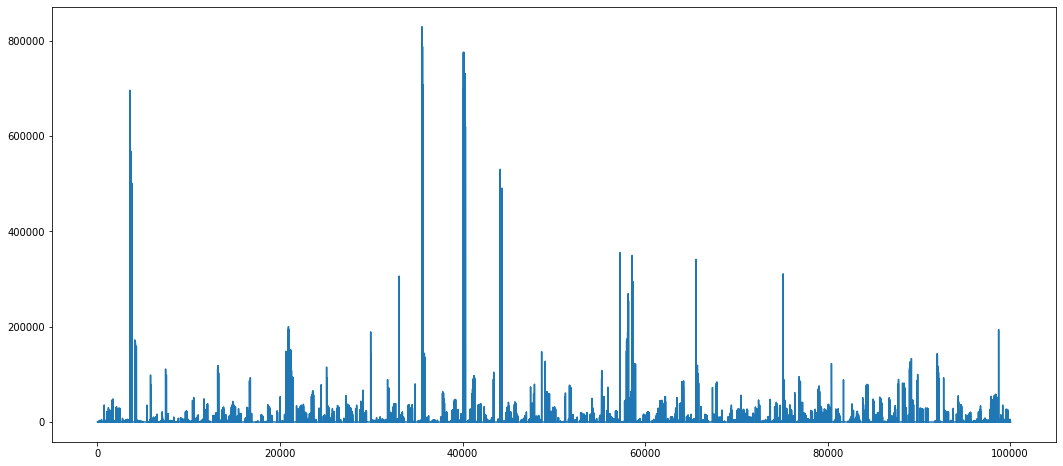

In [35]:
stock_market_dataset['open'].plot(figsize=(18,8))

In [53]:
x = stock_market_dataset[['open','high','low','volume']]
y = stock_market_dataset['close']

In [54]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state= 0)

In [55]:
x_train.shape

(75033, 4)

In [56]:
x_test.shape

(25011, 4)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [58]:
regressor.fit(x_train , y_train)

LinearRegression()

In [60]:
print(regressor.coef_)

[2.71860712e-03 1.70105215e-03 7.85304700e-04 4.26034327e-07]


In [62]:
print(regressor.intercept_)

247.99520649890627


In [64]:
predicted=regressor.predict(x_test)

In [66]:
print(x_test)

         open      high     low   volume
28130    6.89    6.9800    6.73    65139
3237     7.16    7.2695    6.64  1964258
31516    3.75    3.7600    3.67    53365
78618    7.00    7.0300    6.57   430989
72890    3.81    3.8700    3.66   109789
...       ...       ...     ...      ...
62641    2.84    2.9000    2.77   986028
43697    6.50    7.0800    6.46   333807
44693   27.71   28.9800   27.64   779152
78075    5.59    5.6000    5.40  1511912
48779  138.74  139.7225  136.32   778452

[25011 rows x 4 columns]


In [68]:
predicted.shape

(25011,)

In [71]:
dframe=pd.DataFrame(y_test,predicted)

In [73]:
dfr=pd.DataFrame({'Actual price':y_test,'predicted price':predicted})

In [75]:
print(dfr)

       Actual price  predicted price
28130          6.98       248.058848
3237           7.18       248.869093
31516          3.71       248.037415
78618          6.59       248.214971
72890          3.71       248.061796
...             ...              ...
62641          2.81       248.430117
43697          6.96       248.172207
44693         28.88       248.473487
78075          5.45       248.668296
48779        139.33       249.048761

[25011 rows x 2 columns]


In [78]:
dfr.head(20)

,Actual price,predicted price
28130,6.9800,248.058848
3237,7.1800,248.869093
31516,3.7100,248.037415
78618,6.5900,248.214971
72890,3.7100,248.061796
55660,40.5500,248.395533
2463,31.2600,248.163951
38714,1.7600,248.621247
86276,1.5700,249.985018
29865,107.3700,249.156698


In [80]:
regressor.score(x_test,y_test)

0.0003433057674505635

In [83]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 441.2746738552799


In [85]:
print('Mesn Squared Error:' ,metrics.mean_squared_error(y_test,predicted))

Mesn Squared Error: 12282431.026595615


In [87]:
print('Root Mean Squared Error',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error 3504.629941462524


In [89]:
graph=dfr.head(20)

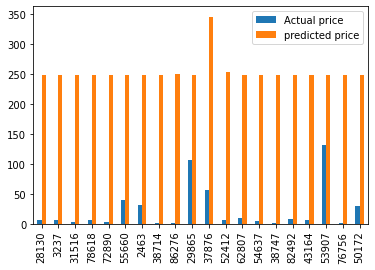

In [91]:
graph.plot(kind='bar')